In [ ]:
import os
import json

# Путь к папке
data_dir = "../public/data"

# Данные
input_file = os.path.join(data_dir, "node_result.json")
with open(input_file, "r") as f:
    nodes = json.load(f)

input_file = os.path.join(data_dir, "edge_results.json")
with open(input_file, "r") as f:
    edges = json.load(f)

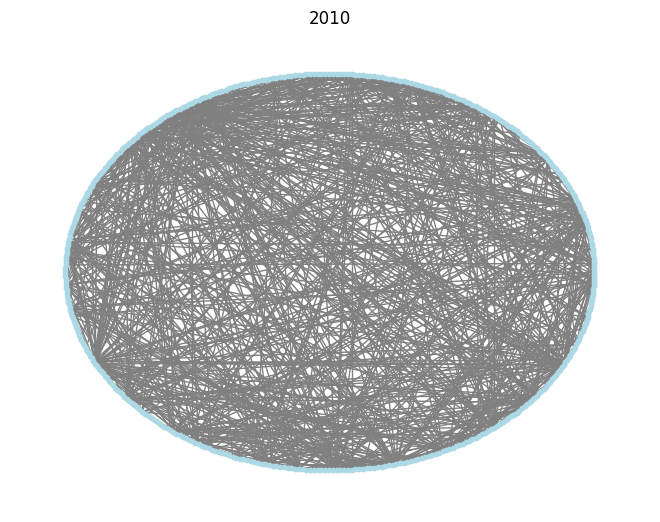

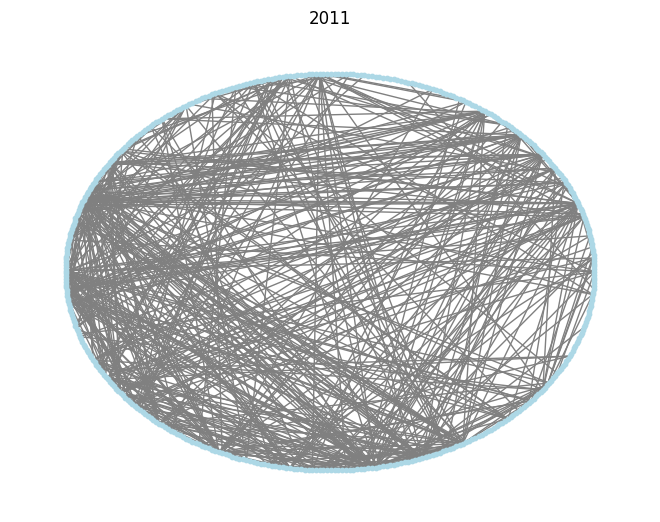

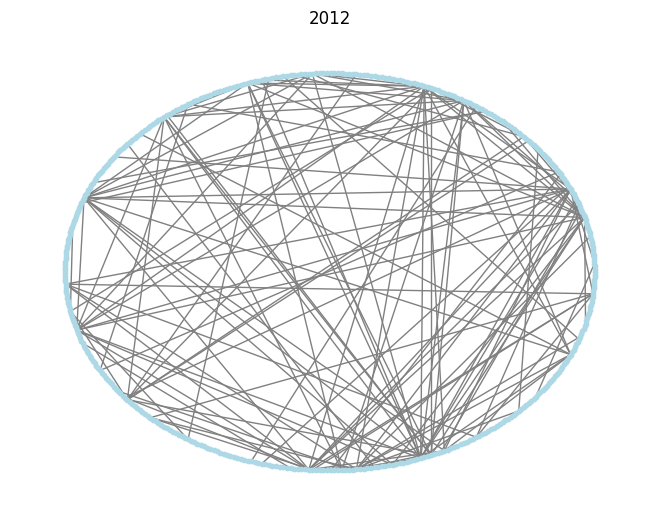

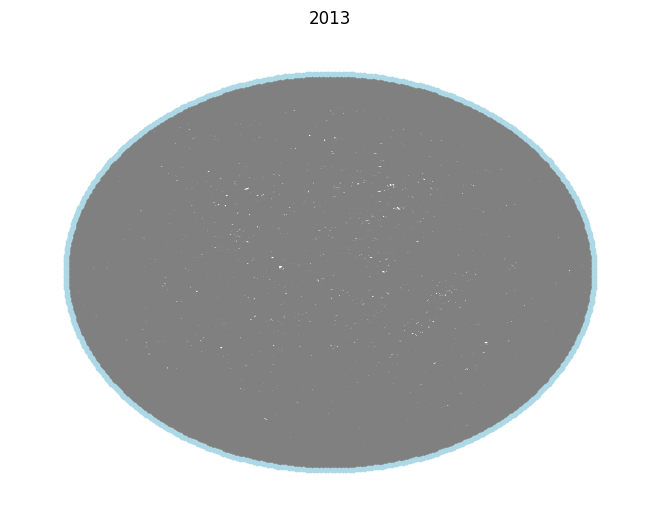

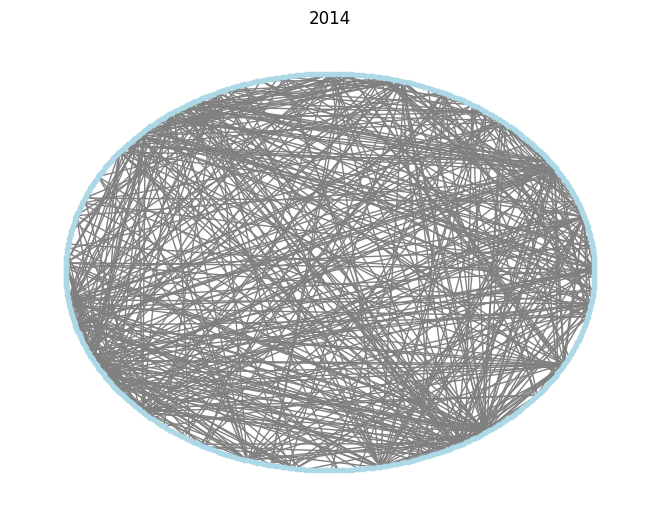

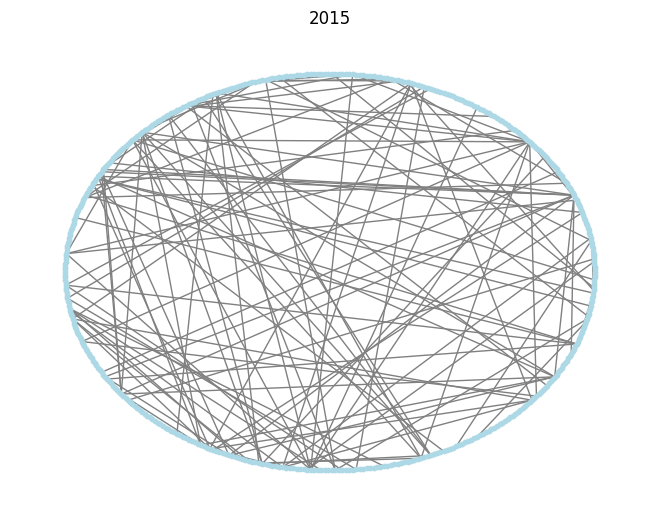

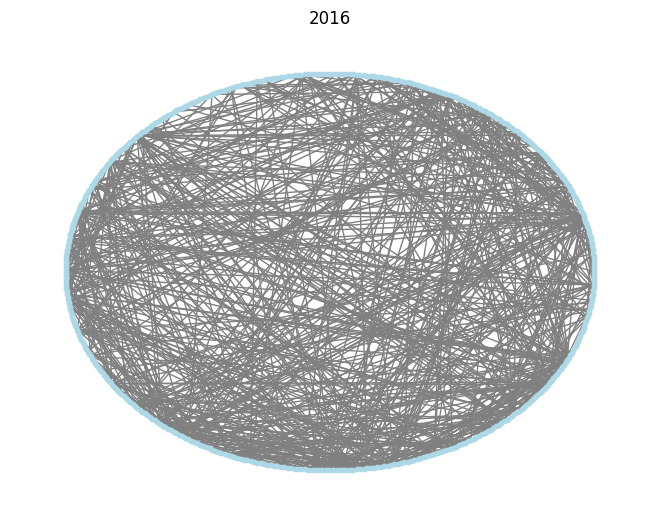

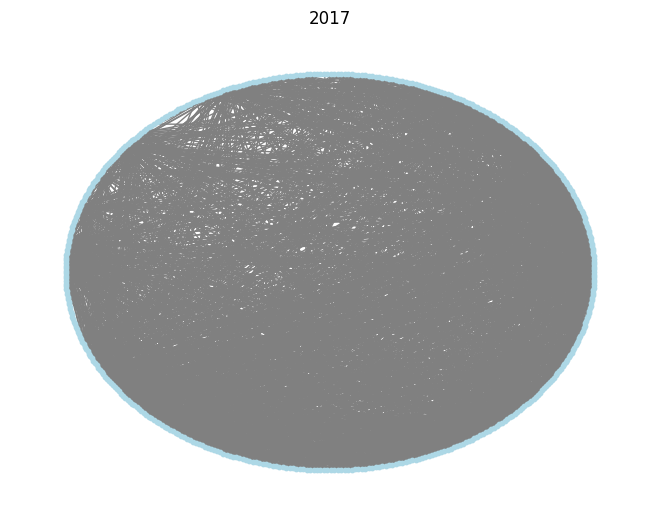

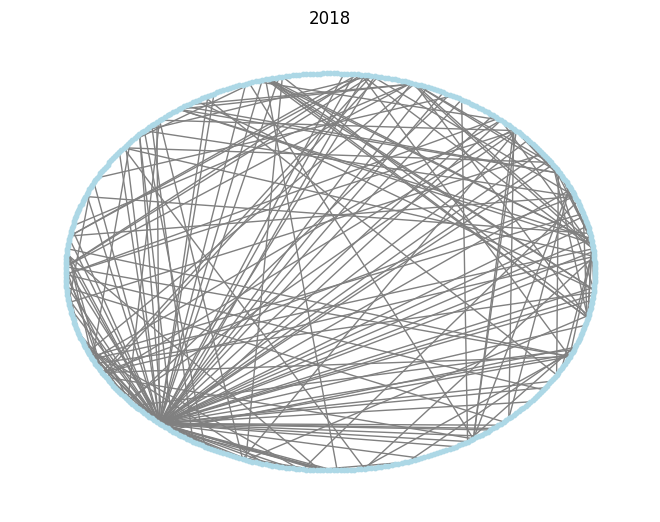

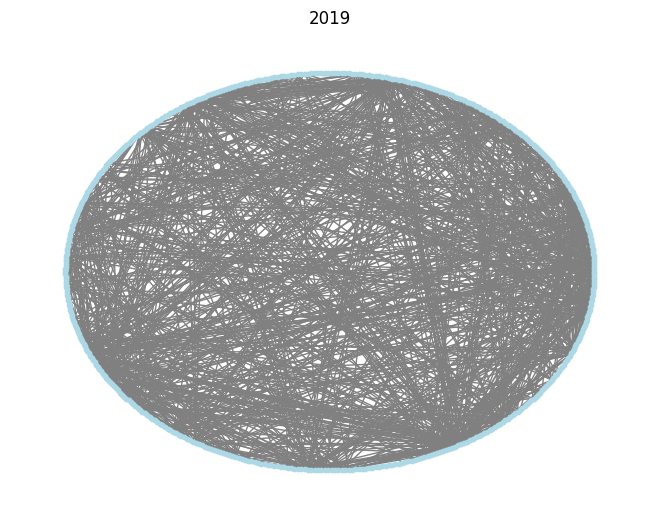

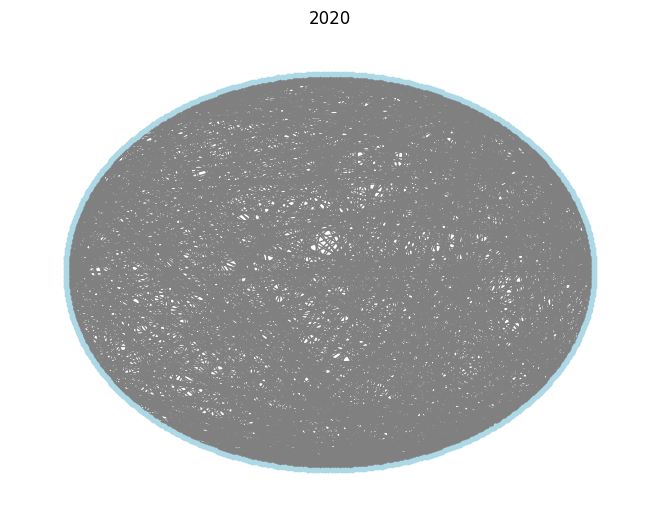

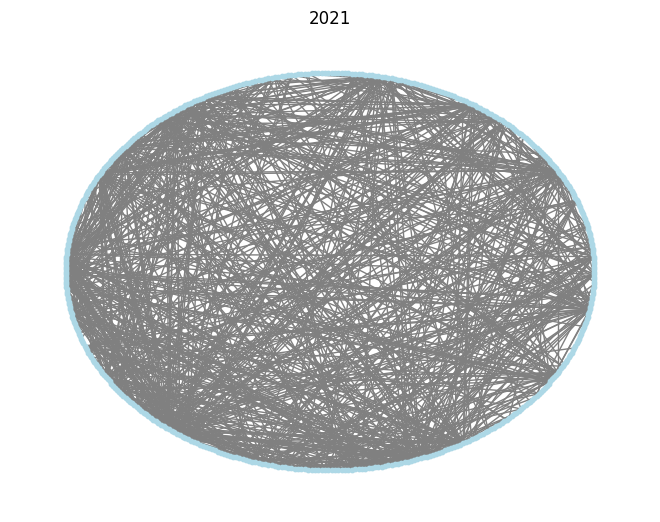

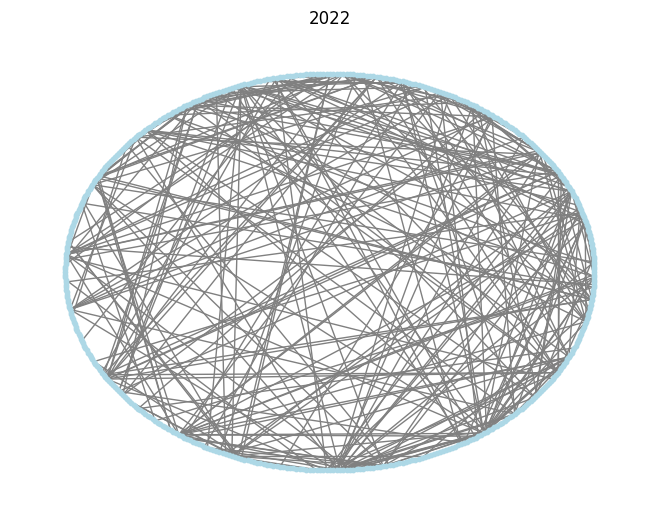

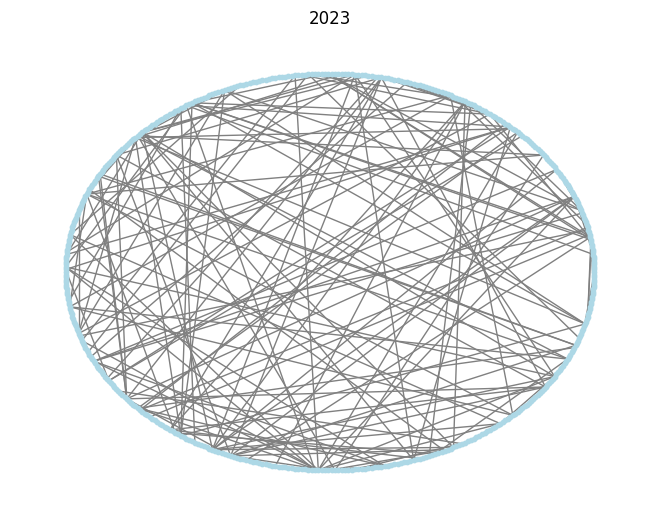

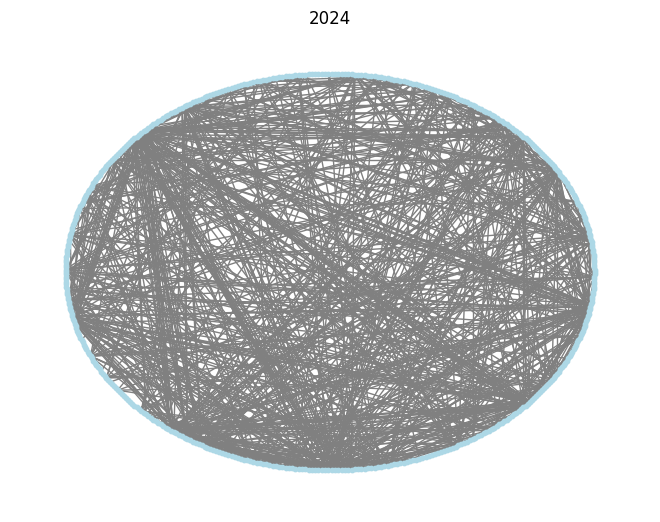

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


def init_graph(nodes, edges, year, visualize=True):
    # Создание графа
    G = nx.Graph()

    # Добавление узлов
    for node in nodes:
        G.add_node(node["id"], name=node["name"], sector=node["sector"])

    # Добавление рёбер
    for edge in edges:
        if edge["correlation"] > 0.95:
            G.add_edge(edge["source"], edge["target"], correlation=edge["correlation"])

    if visualize:
        # Визуализация графа кольцевым образом
        pos = nx.circular_layout(G)  # Кольцевая компоновка
        nx.draw(
            G,
            pos,
            node_color="lightblue",
            edge_color="gray",
            node_size=10,
            width=1,
            with_labels=False,
        )

        # Отображение графа
        plt.title(year)
        plt.show()

    return G


graphs = {k: init_graph(nodes[k], edges[k], k) for k in nodes.keys()}

In [30]:
import statistics


def calculate_graph_characteristics(
    G, year, print_result=True, print_top=0, title="Характеристики графа"
):
    characteristics = {}
    characteristics["Количество узлов"] = G.number_of_nodes()
    characteristics["Количество ребер"] = G.number_of_edges()
    characteristics["Плотность графа"] = G.number_of_edges()
    characteristics["Количество компонент связности"] = nx.density(G)
    characteristics["Количество ребер"] = G.number_of_edges()
    degree_ = list(dict(G.degree()).values())
    characteristics["Степени узлов - мин"] = min(degree_)
    characteristics["Степени узлов - макс"] = max(degree_)
    characteristics["Степени узлов - среднее"] = statistics.mean(degree_)
    characteristics["Степени узлов - стандартное отклонение"] = statistics.stdev(
        degree_
    )

    # Для связанных графов
    # eccentricity_ = list(nx.eccentricity(G).values())
    # characteristics["Эксцентриситеты - мин"] = min(eccentricity_)
    # characteristics["Эксцентриситеты - макс"] = max(eccentricity_)
    # characteristics["Эксцентриситеты - среднее"] = statistics.mean((eccentricity_))
    # characteristics["Эксцентриситеты - стандартное отклонение"] = statistics.stdev(eccentricity_)
    # characteristics["Радиус"] = nx.radius(G)
    # characteristics["Диаметр"] = nx.diameter(G)
    # characteristics["Количество центров"] = len(nx.center(G))
    # characteristics["Количество периферии"] = len(nx.periphery(G))

    # Для каждой вершины
    # characteristics["Среднее кластеризующее"] = nx.average_clustering(G)
    # characteristics["Степень каждой вершины"] = dict(G.degree())
    # characteristics["Расстояния между парами вершин"] = dict(nx.all_pairs_shortest_path_length(G))
    # characteristics["Коэффициент кластеризации"] = nx.clustering(G)
    # characteristics["Степени центральности"] = nx.degree_centrality(G)
    # characteristics["Центральность по близости"] = nx.closeness_centrality(G)
    # characteristics["Центральность по посредничеству"] = nx.betweenness_centrality(G)
    # characteristics["Центральность по собственному вектору"] = nx.eigenvector_centrality(G)

    if print_result:
        print(f"\n{title} {year}:")
        for key, value in characteristics.items():
            try:
                if isinstance(value, dict) and print_top > 0:
                    value = dict(sorted(value.items(), key=lambda x: x[1])[:print_top])
                print(f"{key}: {value}")
            except:
                pass

    return characteristics


for k, g in graphs.items():
    characteristics = calculate_graph_characteristics(g, k)


Характеристики графа 2010:
Количество узлов: 439
Количество ребер: 718
Плотность графа: 718
Количество компонент связности: 0.007468197751219563
Степени узлов - мин: 0
Степени узлов - макс: 43
Степени узлов - среднее: 3.2710706150341684
Степени узлов - стандартное отклонение: 6.804635573601475

Характеристики графа 2011:
Количество узлов: 445
Количество ребер: 478
Плотность графа: 478
Количество компонент связности: 0.00483854641158012
Степени узлов - мин: 0
Степени узлов - макс: 31
Степени узлов - среднее: 2.148314606741573
Степени узлов - стандартное отклонение: 5.232050232034227

Характеристики графа 2012:
Количество узлов: 453
Количество ребер: 132
Плотность графа: 132
Количество компонент связности: 0.001289339506534607
Степени узлов - мин: 0
Степени узлов - макс: 14
Степени узлов - среднее: 0.5827814569536424
Степени узлов - стандартное отклонение: 2.0264542988042242

Характеристики графа 2013:
Количество узлов: 462
Количество ребер: 2518
Плотность графа: 2518
Количество компоне

In [29]:
from networkx.algorithms.approximation import max_clique


def find_max_clique_subgraph(graph):
    clique_nodes = max_clique(graph)
    subgraph = graph.subgraph(clique_nodes)
    return subgraph


subgraphs = {k: find_max_clique_subgraph(v) for k, v in graphs.items()}

In [31]:
for k, g in subgraphs.items():
    characteristics = calculate_graph_characteristics(
        g, k, title="Характеристики целевого подграфа"
    )


Характеристики целевого подграфа 2010:
Количество узлов: 11
Количество ребер: 55
Плотность графа: 55
Количество компонент связности: 1.0
Степени узлов - мин: 10
Степени узлов - макс: 10
Степени узлов - среднее: 10
Степени узлов - стандартное отклонение: 0.0

Характеристики целевого подграфа 2011:
Количество узлов: 9
Количество ребер: 36
Плотность графа: 36
Количество компонент связности: 1.0
Степени узлов - мин: 8
Степени узлов - макс: 8
Степени узлов - среднее: 8
Степени узлов - стандартное отклонение: 0.0

Характеристики целевого подграфа 2012:
Количество узлов: 7
Количество ребер: 21
Плотность графа: 21
Количество компонент связности: 1.0
Степени узлов - мин: 6
Степени узлов - макс: 6
Степени узлов - среднее: 6
Степени узлов - стандартное отклонение: 0.0

Характеристики целевого подграфа 2013:
Количество узлов: 25
Количество ребер: 300
Плотность графа: 300
Количество компонент связности: 1.0
Степени узлов - мин: 24
Степени узлов - макс: 24
Степени узлов - среднее: 24
Степени узлов 

In [51]:
# Помечаем subgraph в данных
new_nodes = {}
new_edges = {}

for k, v in subgraphs.items():
    nodes_year = nodes[k]
    edges_year = edges[k]

    new_nodes_year = []
    new_edges_year = []

    for node in nodes_year:
        if node["id"] in graphs[k]:
            if node["id"] in v:
                node["subgraph"] = "1"
            new_nodes_year.append(node)

    for edge in edges_year:
        if edge["source"] in graphs[k] and edge["target"] in graphs[k]:
            if edge["source"] in v and edge["target"] in v:
                edge["subgraph"] = "1"
            new_edges_year.append(edge)

    new_nodes[k] = new_nodes_year
    new_edges[k] = new_edges_year

In [52]:
import json

# Путь к папке
output_dir = "../public/data"
os.makedirs(output_dir, exist_ok=True)

# Сохранение результатов в JSON файл
output_file = os.path.join(output_dir, "node_result.json")
with open(output_file, "w") as f:
    json.dump(new_nodes, f, indent=4)

print(f"Результаты сохранены в {output_file}")

# Сохранение результатов в JSON файл
output_file = os.path.join(output_dir, "edge_results.json")
with open(output_file, "w") as f:
    json.dump(new_edges, f, indent=4)

print(f"Результаты сохранены в {output_file}")

Результаты сохранены в ../public/data/node_result.json
Результаты сохранены в ../public/data/edge_results.json
